# Задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

## Задание 1

#### Скачайте текст войны и мир (ссылка на github и гугл диск).

In [2]:
#Соединяю все файлы в один
import glob 

read_files = glob.glob("*.txt") 
with open("war_and_peace.txt", "wb") as outfile:
    for f in read_files: 
        with open(f, "rb") as infile: outfile.write(infile.read()) 

#### Очистите его, оставив только русские буквы и символы пробела.

In [3]:
with open('war_and_peace.txt', 'r', encoding = 'UTF8') as f:
    text = f.read()

text = re.sub(r'[^а-яА-ЯёЁ\s]','', text)
text = re.sub('\s+','_', text) #заменю " " на "_"
text = re.sub('\n','', text) #заменю " " на "_"

In [4]:
#проверяю текст на 'ё'
len(re.findall('ё', text))

#На "Ё" так же проверял - их нет :)

2030

In [5]:
#Генерю алфавит (не интересно было набирать в ручную) :)
#генерирую алфалит от "а" до "я" включая "ё" маленькими буквами
a = ord('а')
alphabet_low = ''.join([chr(i) for i in range(a,a+6)] + [chr(a+33)] + [chr(i) for i in range(a+6,a+32)])
#генерирую алфалит от "А" до "Б" включая "Ё" маленькими буквами
a = ord('А')
alphabet_UP = ''.join([chr(i) for i in range(a,a+6)] + [chr(a+33)] + [chr(i) for i in range(a+6,a+32)])
#предыдущая строчка выдаёт код с букой "б" вместо "Ё" - можно было бы удалить, но для красоты я её вставлю
alphabet_UP = re.sub('б','Ё', alphabet_UP)

#склеиваю части алфавита
alphabet = alphabet_low + '_' + alphabet_UP 
alphabet

'абвгдеёжзийклмнопрстуфхцчшщъыьэюя_АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ'

#### Постройте матрицу переходных вероятностей.

In [6]:
POS = {l: i for i, l in enumerate(alphabet)}

probabilities = np.zeros((len(alphabet), len(alphabet)))
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1    
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

D:\Program_Files\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [7]:
df = pd.DataFrame(probabilities, index=(c for c in alphabet), columns=(c for c in alphabet))
df.fillna(0, inplace = True)
df.head()

,а,б,в,г,д,е,ё,ж,з,и,...,Ц,Ч,Ш,Щ,Ъ,Ы,Ь,Э,Ю,Я
а,0.000114,0.008778,0.047244,0.012067,0.027411,0.013884,0.000000,0.017043,0.057764,0.001698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
б,0.058351,0.000638,0.005718,0.000718,0.001569,0.139309,0.000027,0.000479,0.000053,0.049521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
в,0.139859,0.000302,0.000800,0.000926,0.007508,0.111620,0.000010,0.000020,0.012628,0.079461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
г,0.057101,0.000000,0.002260,0.000068,0.062773,0.028449,0.000000,0.000045,0.000068,0.043882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
д,0.160393,0.001284,0.037169,0.000266,0.001077,0.168538,0.000015,0.000561,0.000103,0.098980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.describe()

,а,б,в,г,д,е,ё,ж,з,и,...,Ц,Ч,Ш,Щ,Ъ,Ы,Ь,Э,Ю,Я
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,6.700000e+01,67.0,67.0,67.000000,67.000000,6.700000e+01,67.000000
mean,0.098123,0.005090,0.016892,0.006174,0.014834,0.119390,0.000245,0.010003,0.005973,0.054786,...,0.000002,0.000044,0.000007,5.711068e-07,0.0,0.0,0.000329,0.000031,5.711068e-07,0.003277
std,0.127513,0.013152,0.026046,0.017613,0.025799,0.172947,0.001217,0.034618,0.015392,0.077503,...,0.000015,0.000265,0.000056,4.674711e-06,0.0,0.0,0.002693,0.000231,4.674711e-06,0.025716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000019,0.000000,0.000000,0.000000,0.000000,0.004916,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000
50%,0.051442,0.000000,0.000985,0.000309,0.001569,0.057600,0.000000,0.000000,0.000000,0.014345,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000
75%,0.163810,0.001343,0.030765,0.002004,0.015961,0.159897,0.000000,0.001112,0.001921,0.084353,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000
max,0.645455,0.079231,0.110656,0.115202,0.127273,1.000000,0.008146,0.206651,0.087206,0.335771,...,0.000126,0.001956,0.000457,3.826416e-05,0.0,0.0,0.022042,0.001882,3.826416e-05,0.210526


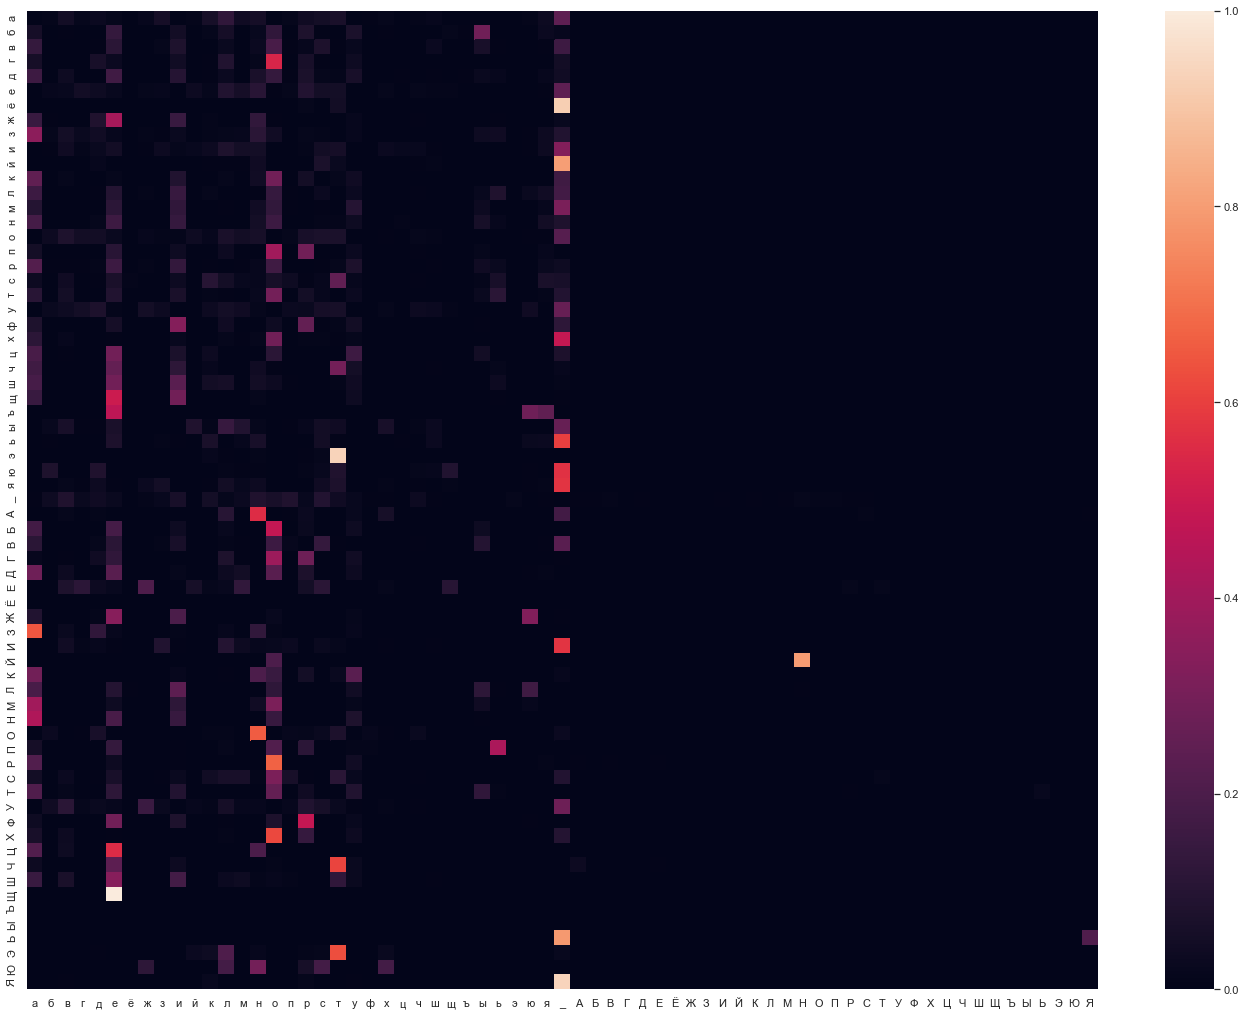

In [9]:
plt.figure(figsize=(24,18))
sns.heatmap(df)
plt.show()

#### Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р;

In [10]:
start = POS['п']
end = POS['р']
prior = 1. / len(alphabet)
for c1 in alphabet:
    for c2 in alphabet:
        proba = (prior * probabilities[start, POS[c1]] * probabilities[POS[c1], end]) 
        + (prior * probabilities[start, POS[c2]] * probabilities[POS[c2], end])
        if proba > 0:
            print(''.join(['п', c1, c2, 'р']), proba)

паар 3.2038057116817976e-05
пабр 3.2038057116817976e-05
павр 3.2038057116817976e-05
пагр 3.2038057116817976e-05
падр 3.2038057116817976e-05
паер 3.2038057116817976e-05
паёр 3.2038057116817976e-05
пажр 3.2038057116817976e-05
пазр 3.2038057116817976e-05
паир 3.2038057116817976e-05
пайр 3.2038057116817976e-05
пакр 3.2038057116817976e-05
палр 3.2038057116817976e-05
памр 3.2038057116817976e-05
панр 3.2038057116817976e-05
паор 3.2038057116817976e-05
папр 3.2038057116817976e-05
парр 3.2038057116817976e-05
паср 3.2038057116817976e-05
патр 3.2038057116817976e-05
паур 3.2038057116817976e-05
пафр 3.2038057116817976e-05
пахр 3.2038057116817976e-05
пацр 3.2038057116817976e-05
пачр 3.2038057116817976e-05
пашр 3.2038057116817976e-05
пащр 3.2038057116817976e-05
паър 3.2038057116817976e-05
паыр 3.2038057116817976e-05
паьр 3.2038057116817976e-05
паэр 3.2038057116817976e-05
паюр 3.2038057116817976e-05
паяр 3.2038057116817976e-05
па_р 3.2038057116817976e-05
паАр 3.2038057116817976e-05
паБр 3.2038057116817

псЖр 2.252131226059116e-08
псЗр 2.252131226059116e-08
псИр 2.252131226059116e-08
псЙр 2.252131226059116e-08
псКр 2.252131226059116e-08
псЛр 2.252131226059116e-08
псМр 2.252131226059116e-08
псНр 2.252131226059116e-08
псОр 2.252131226059116e-08
псПр 2.252131226059116e-08
псРр 2.252131226059116e-08
псСр 2.252131226059116e-08
псТр 2.252131226059116e-08
псУр 2.252131226059116e-08
псФр 2.252131226059116e-08
псХр 2.252131226059116e-08
псЦр 2.252131226059116e-08
псЧр 2.252131226059116e-08
псШр 2.252131226059116e-08
псЩр 2.252131226059116e-08
псЪр 2.252131226059116e-08
псЫр 2.252131226059116e-08
псЬр 2.252131226059116e-08
псЭр 2.252131226059116e-08
псЮр 2.252131226059116e-08
псЯр 2.252131226059116e-08
птар 1.628118327612901e-06
птбр 1.628118327612901e-06
птвр 1.628118327612901e-06
птгр 1.628118327612901e-06
птдр 1.628118327612901e-06
птер 1.628118327612901e-06
птёр 1.628118327612901e-06
птжр 1.628118327612901e-06
птзр 1.628118327612901e-06
птир 1.628118327612901e-06
птйр 1.628118327612901e-06
п

пыбр 3.3697894734702093e-06
пывр 3.3697894734702093e-06
пыгр 3.3697894734702093e-06
пыдр 3.3697894734702093e-06
пыер 3.3697894734702093e-06
пыёр 3.3697894734702093e-06
пыжр 3.3697894734702093e-06
пызр 3.3697894734702093e-06
пыир 3.3697894734702093e-06
пыйр 3.3697894734702093e-06
пыкр 3.3697894734702093e-06
пылр 3.3697894734702093e-06
пымр 3.3697894734702093e-06
пынр 3.3697894734702093e-06
пыор 3.3697894734702093e-06
пыпр 3.3697894734702093e-06
пырр 3.3697894734702093e-06
пыср 3.3697894734702093e-06
пытр 3.3697894734702093e-06
пыур 3.3697894734702093e-06
пыфр 3.3697894734702093e-06
пыхр 3.3697894734702093e-06
пыцр 3.3697894734702093e-06
пычр 3.3697894734702093e-06
пышр 3.3697894734702093e-06
пыщр 3.3697894734702093e-06
пыър 3.3697894734702093e-06
пыыр 3.3697894734702093e-06
пыьр 3.3697894734702093e-06
пыэр 3.3697894734702093e-06
пыюр 3.3697894734702093e-06
пыяр 3.3697894734702093e-06
пы_р 3.3697894734702093e-06
пыАр 3.3697894734702093e-06
пыБр 3.3697894734702093e-06
пыВр 3.3697894734702

#### Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [11]:
#удаляю из df строку и столбец '_' - слово не может содержать этот символ
df2 = df.drop(columns=['_'])
df2.drop(['_'], inplace = True)

word = ['Б']
word_len = 8 #длина гененируемого слова

#вибираю буквы с максивальной вероятностью 
for i in range(word_len):
    max_val = df2.loc[df2.index == word[i]].values.max()
    for n in df2.columns:
        if df2[n].max() >= max_val:
            word.append(n)

#Разбиваю строку по 8 символов
[word[x:x+8] for x in range (0, len(word), 8)]

[['Б', 'а', 'е', 'н', 'о', 'т', 'Н', 'а'],
 ['д', 'е', 'ж', 'и', 'л', 'м', 'н', 'о'],
 ['р', 'с', 'т', 'у', 'х', 'ы', 'ь', 'ю'],
 ['я', 'Н', 'Я', 'а', 'в', 'г', 'д', 'е'],
 ['ж', 'и', 'л', 'м', 'н', 'о', 'р', 'с'],
 ['т', 'у', 'х', 'ы', 'ь', 'ю', 'я', 'Н'],
 ['Я', 'а', 'е', 'ж', 'и', 'л', 'н', 'о'],
 ['р', 'т', 'у', 'ы', 'ь', 'ю', 'я', 'Н'],
 ['Я', 'а', 'в', 'г', 'д', 'е', 'ж', 'з'],
 ['и', 'й', 'к', 'л', 'м', 'н', 'о', 'р'],
 ['с', 'т', 'у', 'х', 'щ', 'ы', 'ь', 'ю'],
 ['я', 'Н', 'Я', 'а', 'е', 'и', 'н', 'о'],
 ['р', 'т', 'ь', 'ю', 'Н', 'а', 'е', 'н'],
 ['о', 'р', 'т', 'Н', 'а', 'д', 'е', 'ж'],
 ['и', 'л', 'м', 'н', 'о', 'р', 'с', 'т'],
 ['у', 'х', 'ы', 'ь', 'ю', 'я', 'Н', 'Я']]

##  Задание 2 (заготовка)
Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [12]:
from hmmlearn.hmm import GaussianHMM
import numpy as np

In [13]:
#Исходный TS
series = pd.read_csv("Series/daily-total-female-births-in-cal.csv")["Count"]
values = series.values.reshape(-1,1)

In [14]:
#Подбираю n_components
best_score_dict = {}
n = 15
for i in range(1, n):       
    model = GaussianHMM(n_components=i, covariance_type="diag", n_iter=1000)
    model.fit(values)
    best_score_dict[i] = model.score(values)
best_score = dict([max(best_score_dict.items(), key=lambda k_v: k_v[1])])

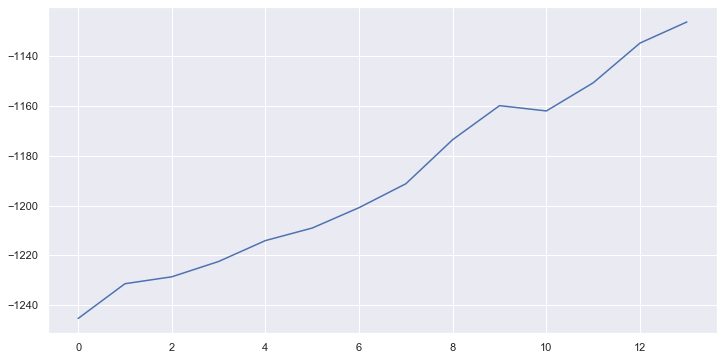

In [15]:
# График score для модели
plt.figure(figsize=(12, 6))
plt.plot(list(best_score_dict.values()))

С ростом правдоподобия модели растёт n_components. После n_components = 20 питон начинает выдавать предупреждения. Вероятно это вызвано нестационарностью ряда.
Выбтраю n_components = 15.

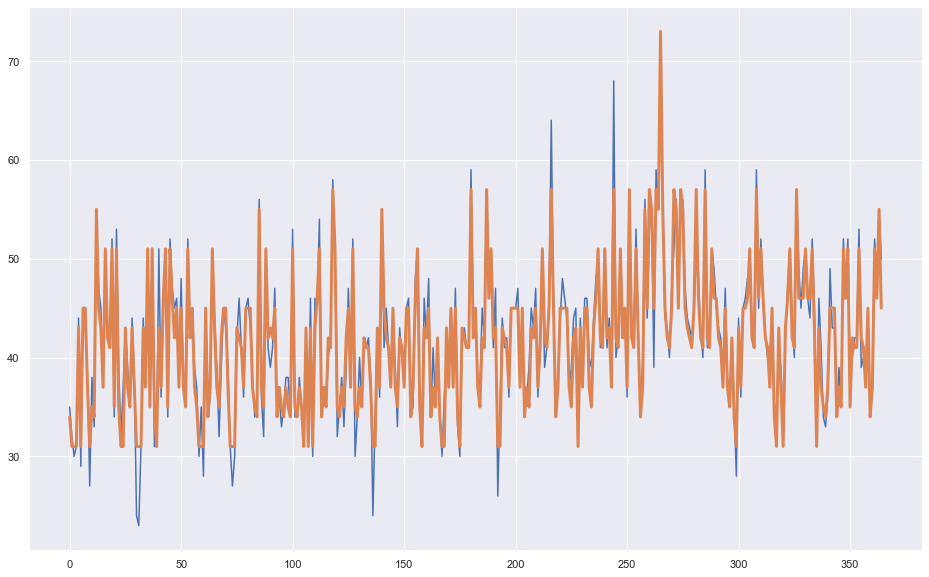

In [16]:
#Делаю предикт для ряда
model = GaussianHMM(n_components = list(best_score.keys())[0], covariance_type="diag", n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(16, 10))
plt.plot(values)
plt.plot(means, linewidth=3)

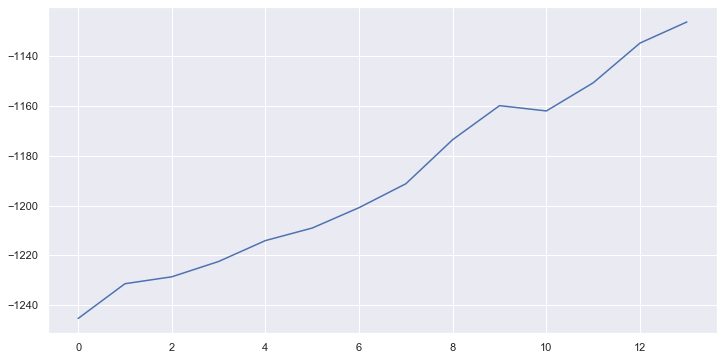

In [17]:
# График score от n_components для модели
plt.figure(figsize=(12, 6))
plt.plot(list(best_score_dict.values()))

#best_score_dict

In [18]:
#Диффиренцированный ряд

series_dif = np.diff(series, 3)
values = series_dif.reshape(-1,1)

#Подбираю n_components
best_score_dict = {}
n = 15
for i in range(1, n):       
    model = GaussianHMM(n_components=i, covariance_type="diag", n_iter=1000)
    model.fit(values)
    best_score_dict[i] = model.score(values)
best_score = dict([max(best_score_dict.items(), key=lambda k_v: k_v[1])])

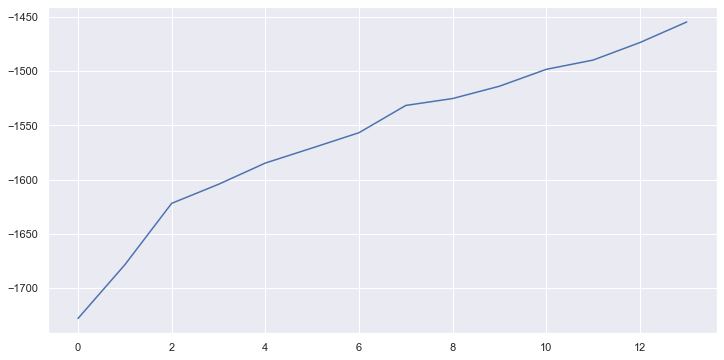

In [19]:
# График score от n_components для модели
plt.figure(figsize=(12, 6))
plt.plot(list(best_score_dict.values()))

#best_score_dict

Правдоподобность модели растёт с ростом количества компонет, хотя и по явно другому закону, чем на исходном ряде. На своём ноутбуке я не смог достигнуть точки перегиба. Вероятно, необходимо решить какую-то оптимизационную задачу, что бы подобрать n_companents.

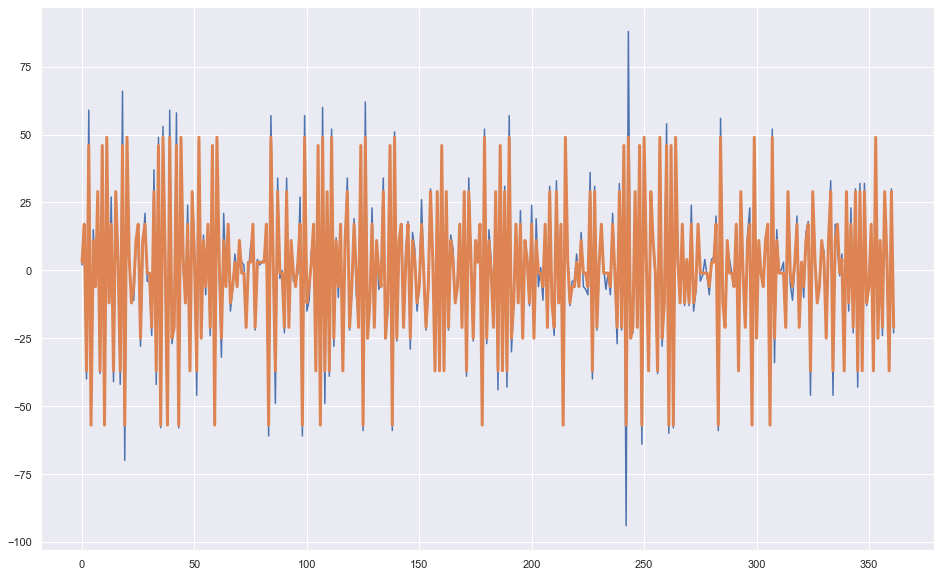

In [20]:
#Делаю предикт для ряда
model = GaussianHMM(n_components = list(best_score.keys())[0], covariance_type="diag", n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(16, 10))
plt.plot(values)
plt.plot(means, linewidth=3)